In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
import matplotlib.pyplot as plt

In [2]:
learningRate = 1/20

x = np.array([1, 2, 3, 4, 5])
y = np.array([118, 122, 145, 149, 186])

m_current = 20
b_current = 100
y_prediction = m_current * x + b_current

# calculate gradients. 
m_gradient = np.mean (x*(y_prediction - y) )
b_gradient = np.mean (y_prediction - y)

# update the weights - Regression Coefficients 
m_current = m_current - learningRate * m_gradient
b_current = b_current - learningRate * b_gradient

print(m_current)
print(b_current)

17.23
99.2


In [3]:
df_train = pd.read_csv("training_data_ex.csv")
df_test = pd.read_csv("test_data_ex.csv")

In [4]:
X_train = df_train.drop(columns="label")
y_train = df_train.label

X_test = df_test.drop(columns="label")
y_test = df_test.label

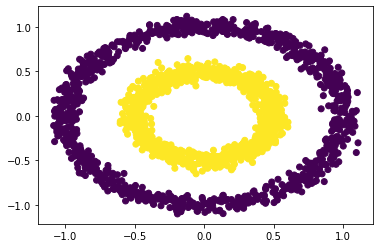

In [5]:
plt.scatter(X_test.f1, X_test.f2, c=y_test)

In [6]:
lg = LogisticRegression().fit(X_train, y_train)
lg_pred = lg.predict(X_test)
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       980
           1       0.00      0.00      0.00      1020

    accuracy                           0.49      2000
   macro avg       0.24      0.50      0.33      2000
weighted avg       0.24      0.49      0.32      2000



C:\Users\siemy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siemy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siemy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


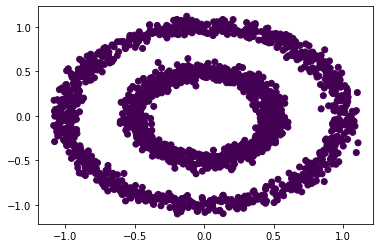

In [7]:
plt.scatter(X_test.f1, X_test.f2, c=lg_pred)

In [8]:
svm = SVC().fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



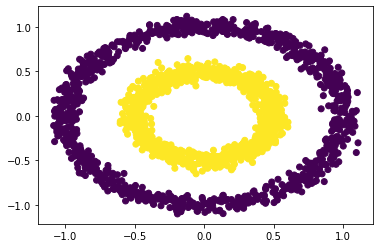

In [9]:
plt.scatter(X_test.f1, X_test.f2, c=svm_pred)

In [10]:
svm2 = SVC(kernel="sigmoid").fit(X_train, y_train)
svm2_pred = svm.predict(X_test)
print(classification_report(y_test, svm2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



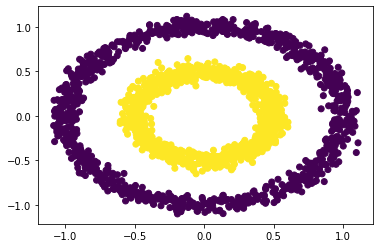

In [11]:
plt.scatter(X_test.f1, X_test.f2, c=svm2_pred)

In [12]:
agg = AgglomerativeClustering(linkage="single")
agg_pred = agg.fit_predict(X_train)

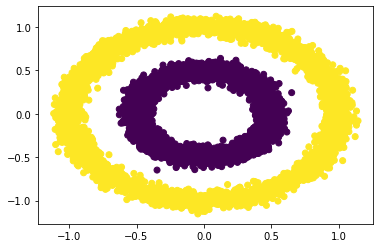

In [13]:
plt.scatter(X_train.f1, X_train.f2, c=agg_pred)

In [14]:
db = DBSCAN(eps=0.1)
db_pred = db.fit_predict(X_train)

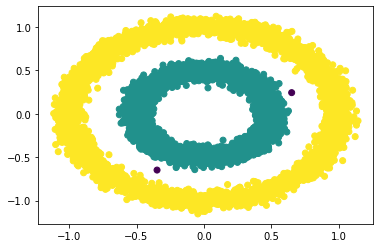

In [15]:
plt.scatter(X_train.f1, X_train.f2, c=db_pred)

In [16]:
km = KMeans(2)
km_pred = km.fit_predict(X_train)

C:\Users\siemy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


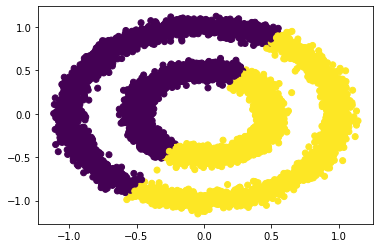

In [17]:
plt.scatter(X_train.f1, X_train.f2, c=km_pred)

In [33]:
centroids = np.array([3, 5, 10], dtype='float')
points = np.array([3, 5, 7, 8, 10, 25, 27])

dist = np.empty((len(centroids), len(points)))

for i, c in enumerate(centroids):
    dist[i,] = abs(points-c)
    
min_dist = dist.argmin(axis=0)

for i, c in enumerate(centroids):
    centroids[i] = points[min_dist==i].mean()

centroids

array([ 3. ,  6. , 17.5])